In [486]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils.utils import *
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import davies_bouldin_score

In [487]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [488]:
# Set up paths
script_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(script_dir, os.pardir))
tableu_dir = os.path.join(root_dir, 'tableau')
porcessed_data_dir = os.path.join(script_dir, 'processed_data')

In [489]:
output_df = pd.read_csv(os.path.join(tableu_dir, 'bardis_ensemble_python_ver_100.csv'))
output_df

,Resources,Economy,Bureaucracy,Pollution,time,run_id
0,1.000000,0.100000,1.000000e-02,0.001000,0.0,1.0
1,0.999951,0.100172,1.004647e-02,0.001101,0.2,1.0
2,0.999901,0.100345,1.009319e-02,0.001203,0.4,1.0
3,0.999849,0.100519,1.014014e-02,0.001304,0.6,1.0
4,0.999796,0.100694,1.018734e-02,0.001406,0.8,1.0
...,...,...,...,...,...,...
100095,0.000209,0.020162,9.452395e-07,1.143534,199.2,100.0
100096,0.000209,0.020162,9.224389e-07,1.143534,199.4,100.0
100097,0.000209,0.020162,9.001884e-07,1.143534,199.6,100.0
100098,0.000209,0.020162,8.784745e-07,1.143534,199.8,100.0


In [490]:
output_df.min()

Resources      3.688220e-06
Economy        2.822054e-04
Bureaucracy    9.963573e-18
Pollution      1.000000e-03
time           0.000000e+00
run_id         1.000000e+00
dtype: float64

In [491]:
fe = FeatureExtractor()
edau = EDAUtils()

# Time Series Clustering (Simple Approach)

## Create freatures df

In [492]:
transformed_output_df = output_df.groupby("run_id").apply(fe.extract_ts_features).reset_index()
transformed_output_df.head() 

/tmp/ipykernel_9114/2261743549.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transformed_output_df = output_df.groupby("run_id").apply(fe.extract_ts_features).reset_index()


,run_id,Resources_final,Resources_max,Resources_min,Resources_auc,Resources_final_initial_diff,Resources_delta_25,Resources_delta_50,Resources_delta_75,Resources_delta_100,...,Pollution_auc,Pollution_final_initial_diff,Pollution_delta_25,Pollution_delta_50,Pollution_delta_75,Pollution_delta_100,Pollution_delta_125,Pollution_delta_150,Pollution_delta_175,Pollution_delta_200
0,1.0,0.013482,1.0,0.012950,67.206526,-0.986518,-0.001908,-0.008547,-0.039775,-0.000163,...,116.316926,1.014576,0.000732,0.001455,0.008233,0.016480,0.000056,0.000013,0.000013,0.000013
1,2.0,0.000045,1.0,0.000045,51.009895,-0.999955,-0.005797,-0.019693,-0.005408,-0.000003,...,123.070621,1.070811,0.001877,0.003324,0.009279,0.024890,0.001662,0.000063,0.000003,0.000001
2,3.0,0.010809,1.0,0.010809,70.233630,-0.989191,-0.002555,-0.007302,-0.025920,-0.002112,...,113.628081,1.052842,0.001446,0.002349,0.005376,0.034101,0.003066,0.000078,0.000017,0.000016
3,4.0,0.016318,1.0,0.016318,74.944802,-0.983682,-0.004887,-0.008939,-0.011405,-0.008193,...,50.121846,0.450646,0.001870,0.002926,0.003631,0.003365,0.002713,0.001786,0.000906,0.000415
4,5.0,0.000137,1.0,0.000137,64.836249,-0.999863,-0.003191,-0.009570,-0.027257,-0.000636,...,89.860313,0.869236,0.001066,0.001869,0.003498,0.022283,0.005552,0.000136,0.000005,0.000003


In [493]:
transformed_output_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   run_id                          100 non-null    float64
 1   Resources_final                 100 non-null    float64
 2   Resources_max                   100 non-null    float64
 3   Resources_min                   100 non-null    float64
 4   Resources_auc                   100 non-null    float64
 5   Resources_final_initial_diff    100 non-null    float64
 6   Resources_delta_25              100 non-null    float64
 7   Resources_delta_50              100 non-null    float64
 8   Resources_delta_75              100 non-null    float64
 9   Resources_delta_100             100 non-null    float64
 10  Resources_delta_125             100 non-null    float64
 11  Resources_delta_150             100 non-null    float64
 12  Resources_delta_175             100 n

## Data Cleaning

- Drop duplicates?

In [494]:
transformed_output_df.isnull().sum().sort_values(ascending=False).head()


run_id             0
Resources_final    0
Resources_max      0
Resources_min      0
Resources_auc      0
dtype: int64

In [495]:
# Check for duplicates
transformed_output_df.duplicated().sum()

np.int64(0)

In [496]:
# Drop run_id to create features dataframe
features_df = transformed_output_df.drop(columns=["run_id"])
features_df.head()

,Resources_final,Resources_max,Resources_min,Resources_auc,Resources_final_initial_diff,Resources_delta_25,Resources_delta_50,Resources_delta_75,Resources_delta_100,Resources_delta_125,...,Pollution_auc,Pollution_final_initial_diff,Pollution_delta_25,Pollution_delta_50,Pollution_delta_75,Pollution_delta_100,Pollution_delta_125,Pollution_delta_150,Pollution_delta_175,Pollution_delta_200
0,0.013482,1.0,0.012950,67.206526,-0.986518,-0.001908,-0.008547,-0.039775,-0.000163,5.934331e-06,...,116.316926,1.014576,0.000732,0.001455,0.008233,0.016480,0.000056,0.000013,0.000013,0.000013
1,0.000045,1.0,0.000045,51.009895,-0.999955,-0.005797,-0.019693,-0.005408,-0.000003,-8.674280e-08,...,123.070621,1.070811,0.001877,0.003324,0.009279,0.024890,0.001662,0.000063,0.000003,0.000001
2,0.010809,1.0,0.010809,70.233630,-0.989191,-0.002555,-0.007302,-0.025920,-0.002112,-2.920877e-05,...,113.628081,1.052842,0.001446,0.002349,0.005376,0.034101,0.003066,0.000078,0.000017,0.000016
3,0.016318,1.0,0.016318,74.944802,-0.983682,-0.004887,-0.008939,-0.011405,-0.008193,-3.251354e-03,...,50.121846,0.450646,0.001870,0.002926,0.003631,0.003365,0.002713,0.001786,0.000906,0.000415
4,0.000137,1.0,0.000137,64.836249,-0.999863,-0.003191,-0.009570,-0.027257,-0.000636,-2.766284e-06,...,89.860313,0.869236,0.001066,0.001869,0.003498,0.022283,0.005552,0.000136,0.000005,0.000003


## EDA

In [497]:
def get_stock_var_features_subset(df, stock_var_name):
    subset_df = df[[col for col in df.columns if col.startswith(stock_var_name)]].copy()
    return subset_df

In [498]:
resources_feat_df = get_stock_var_features_subset(features_df, 'Resources')
resources_feat_df.describe()

,Resources_final,Resources_max,Resources_min,Resources_auc,Resources_final_initial_diff,Resources_delta_25,Resources_delta_50,Resources_delta_75,Resources_delta_100,Resources_delta_125,Resources_delta_150,Resources_delta_175,Resources_delta_200
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,0.032213,1.000023,0.031830,68.786965,-0.967787,-0.003732,-0.017674,-0.011895,-4.541336e-03,-1.323432e-03,-3.862862e-04,-1.659273e-04,-9.317213e-05
std,0.062762,0.000185,0.062631,21.863823,0.062762,0.001917,0.016050,0.011115,6.790833e-03,2.843291e-03,1.055049e-03,4.967642e-04,2.862718e-04
min,0.000004,1.000000,0.000004,38.937757,-0.999996,-0.008979,-0.062115,-0.039775,-2.561129e-02,-1.419705e-02,-5.022350e-03,-2.320669e-03,-1.431795e-03
25%,0.000800,1.000000,0.000800,50.271104,-0.999200,-0.005098,-0.025292,-0.022015,-8.053584e-03,-5.900437e-04,-6.712426e-05,-2.110481e-05,-1.929658e-05
50%,0.005337,1.000000,0.004842,64.854883,-0.994663,-0.003413,-0.009888,-0.009745,-3.061632e-04,-2.420993e-06,-2.324246e-07,-1.164573e-07,-6.377412e-08
75%,0.036376,1.000000,0.034142,83.662554,-0.963624,-0.002267,-0.005503,-0.000670,-5.880249e-07,3.666515e-07,8.266063e-07,8.436308e-07,9.173784e-07
max,0.377892,1.001778,0.377892,139.780020,-0.622108,-0.000651,-0.002424,-0.000001,1.214399e-05,6.878465e-05,1.107529e-04,1.152203e-04,1.192814e-04


In [499]:
economy_feat_df = get_stock_var_features_subset(features_df, 'Economy')
economy_feat_df.describe()

,Economy_final,Economy_max,Economy_min,Economy_auc,Economy_final_initial_diff,Economy_delta_25,Economy_delta_50,Economy_delta_75,Economy_delta_100,Economy_delta_125,Economy_delta_150,Economy_delta_175,Economy_delta_200
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,0.186472,0.586407,0.074900,44.004456,0.086472,0.002931,0.009650,-0.002398,-0.002426,-0.001393,-3.096604e-04,-4.381017e-05,-1.364528e-05
std,0.186734,0.129673,0.033524,21.443843,0.186734,0.001537,0.012302,0.015729,0.008815,0.004221,1.283033e-03,1.890112e-04,7.529799e-05
min,0.000282,0.267793,0.000282,16.383969,-0.099718,0.000898,-0.055842,-0.041896,-0.030521,-0.021337,-9.010188e-03,-9.105588e-04,-6.637229e-04
25%,0.051073,0.511534,0.051073,26.083151,-0.048927,0.001731,0.003418,-0.011488,-0.004430,-0.000835,-3.515574e-05,-4.678754e-06,-2.133735e-06
50%,0.125518,0.605167,0.100000,39.675963,0.025518,0.002519,0.006576,0.003439,-0.000280,-0.000014,-1.564102e-06,-1.059876e-06,-9.842541e-07
75%,0.235817,0.693788,0.100000,54.924260,0.135817,0.003995,0.015434,0.008110,0.000288,-0.000001,-4.065644e-07,-3.444456e-07,-3.467632e-07
max,0.741513,0.815582,0.100000,104.844381,0.641513,0.006920,0.034595,0.022920,0.013586,0.005482,1.541790e-03,5.594198e-04,1.563437e-04


In [500]:
bureaucracy_feat_df = get_stock_var_features_subset(features_df, 'Bureaucracy')
bureaucracy_feat_df.describe()

,Bureaucracy_final,Bureaucracy_max,Bureaucracy_min,Bureaucracy_auc,Bureaucracy_final_initial_diff,Bureaucracy_delta_25,Bureaucracy_delta_50,Bureaucracy_delta_75,Bureaucracy_delta_100,Bureaucracy_delta_125,Bureaucracy_delta_150,Bureaucracy_delta_175,Bureaucracy_delta_200
count,1.000000e+02,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.174696e-04,0.402153,4.621931e-04,12.484874,-0.009483,0.000523,0.005909,-0.000963,-0.003694,-0.001898,-8.894423e-04,-1.551384e-04,-2.794658e-05
std,1.833371e-03,0.228020,1.410891e-03,5.627857,0.001833,0.000300,0.011315,0.017916,0.009539,0.004885,2.305560e-03,4.915896e-04,7.896445e-05
min,9.963573e-18,0.016701,9.963573e-18,2.203934,-0.010000,0.000107,0.000083,-0.051288,-0.028950,-0.023091,-1.247471e-02,-4.207510e-03,-5.191667e-04
25%,1.004678e-10,0.247795,1.004678e-10,8.495402,-0.010000,0.000261,0.000602,-0.004878,-0.010505,-0.001270,-3.703077e-04,-5.809816e-05,-2.925633e-06
50%,7.884902e-08,0.402212,7.884902e-08,12.316597,-0.010000,0.000477,0.001657,0.001350,-0.001382,-0.000179,-1.910167e-05,-5.309693e-07,-1.222647e-08
75%,2.057351e-05,0.583605,2.057351e-05,16.070477,-0.009979,0.000711,0.005056,0.008848,0.000325,-0.000026,-4.435843e-07,-3.229773e-09,-2.214765e-11
max,1.552766e-02,0.940229,1.000000e-02,31.295500,0.005528,0.001485,0.069610,0.034143,0.024318,0.012482,-3.714655e-12,-3.453763e-15,-3.209694e-18


In [501]:
pollution_feat_df = get_stock_var_features_subset(features_df, 'Pollution')
pollution_feat_df.describe()

,Pollution_final,Pollution_max,Pollution_min,Pollution_auc,Pollution_final_initial_diff,Pollution_delta_25,Pollution_delta_50,Pollution_delta_75,Pollution_delta_100,Pollution_delta_125,Pollution_delta_150,Pollution_delta_175,Pollution_delta_200
count,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,0.973625,0.973625,1.000000e-03,109.756610,0.972625,0.001416,0.002977,0.015648,0.010808,4.680250e-03,1.630525e-03,4.031539e-04,1.698118e-04
std,0.203035,0.203035,2.179328e-19,32.309538,0.203035,0.000421,0.001899,0.015608,0.009795,7.170710e-03,3.579393e-03,8.687189e-04,4.031047e-04
min,0.439614,0.439614,1.000000e-03,42.052307,0.438614,0.000670,0.001100,0.001806,0.000007,4.592325e-07,4.477976e-07,2.081377e-07,1.710876e-07
25%,0.912793,0.912793,1.000000e-03,88.895046,0.911793,0.001067,0.001942,0.003443,0.003358,7.712456e-05,4.795090e-06,2.109121e-06,1.156933e-06
50%,1.048114,1.048114,1.000000e-03,113.382609,1.047114,0.001380,0.002499,0.007819,0.007040,1.065668e-03,6.260693e-05,1.713377e-05,1.094106e-05
75%,1.122832,1.122832,1.000000e-03,138.344302,1.121832,0.001760,0.003334,0.024305,0.016386,5.652127e-03,1.400720e-03,2.398882e-04,6.325501e-05
max,1.190380,1.190380,1.000000e-03,158.047708,1.189380,0.002388,0.013487,0.054237,0.042968,3.228302e-02,2.173180e-02,5.133505e-03,2.049225e-03


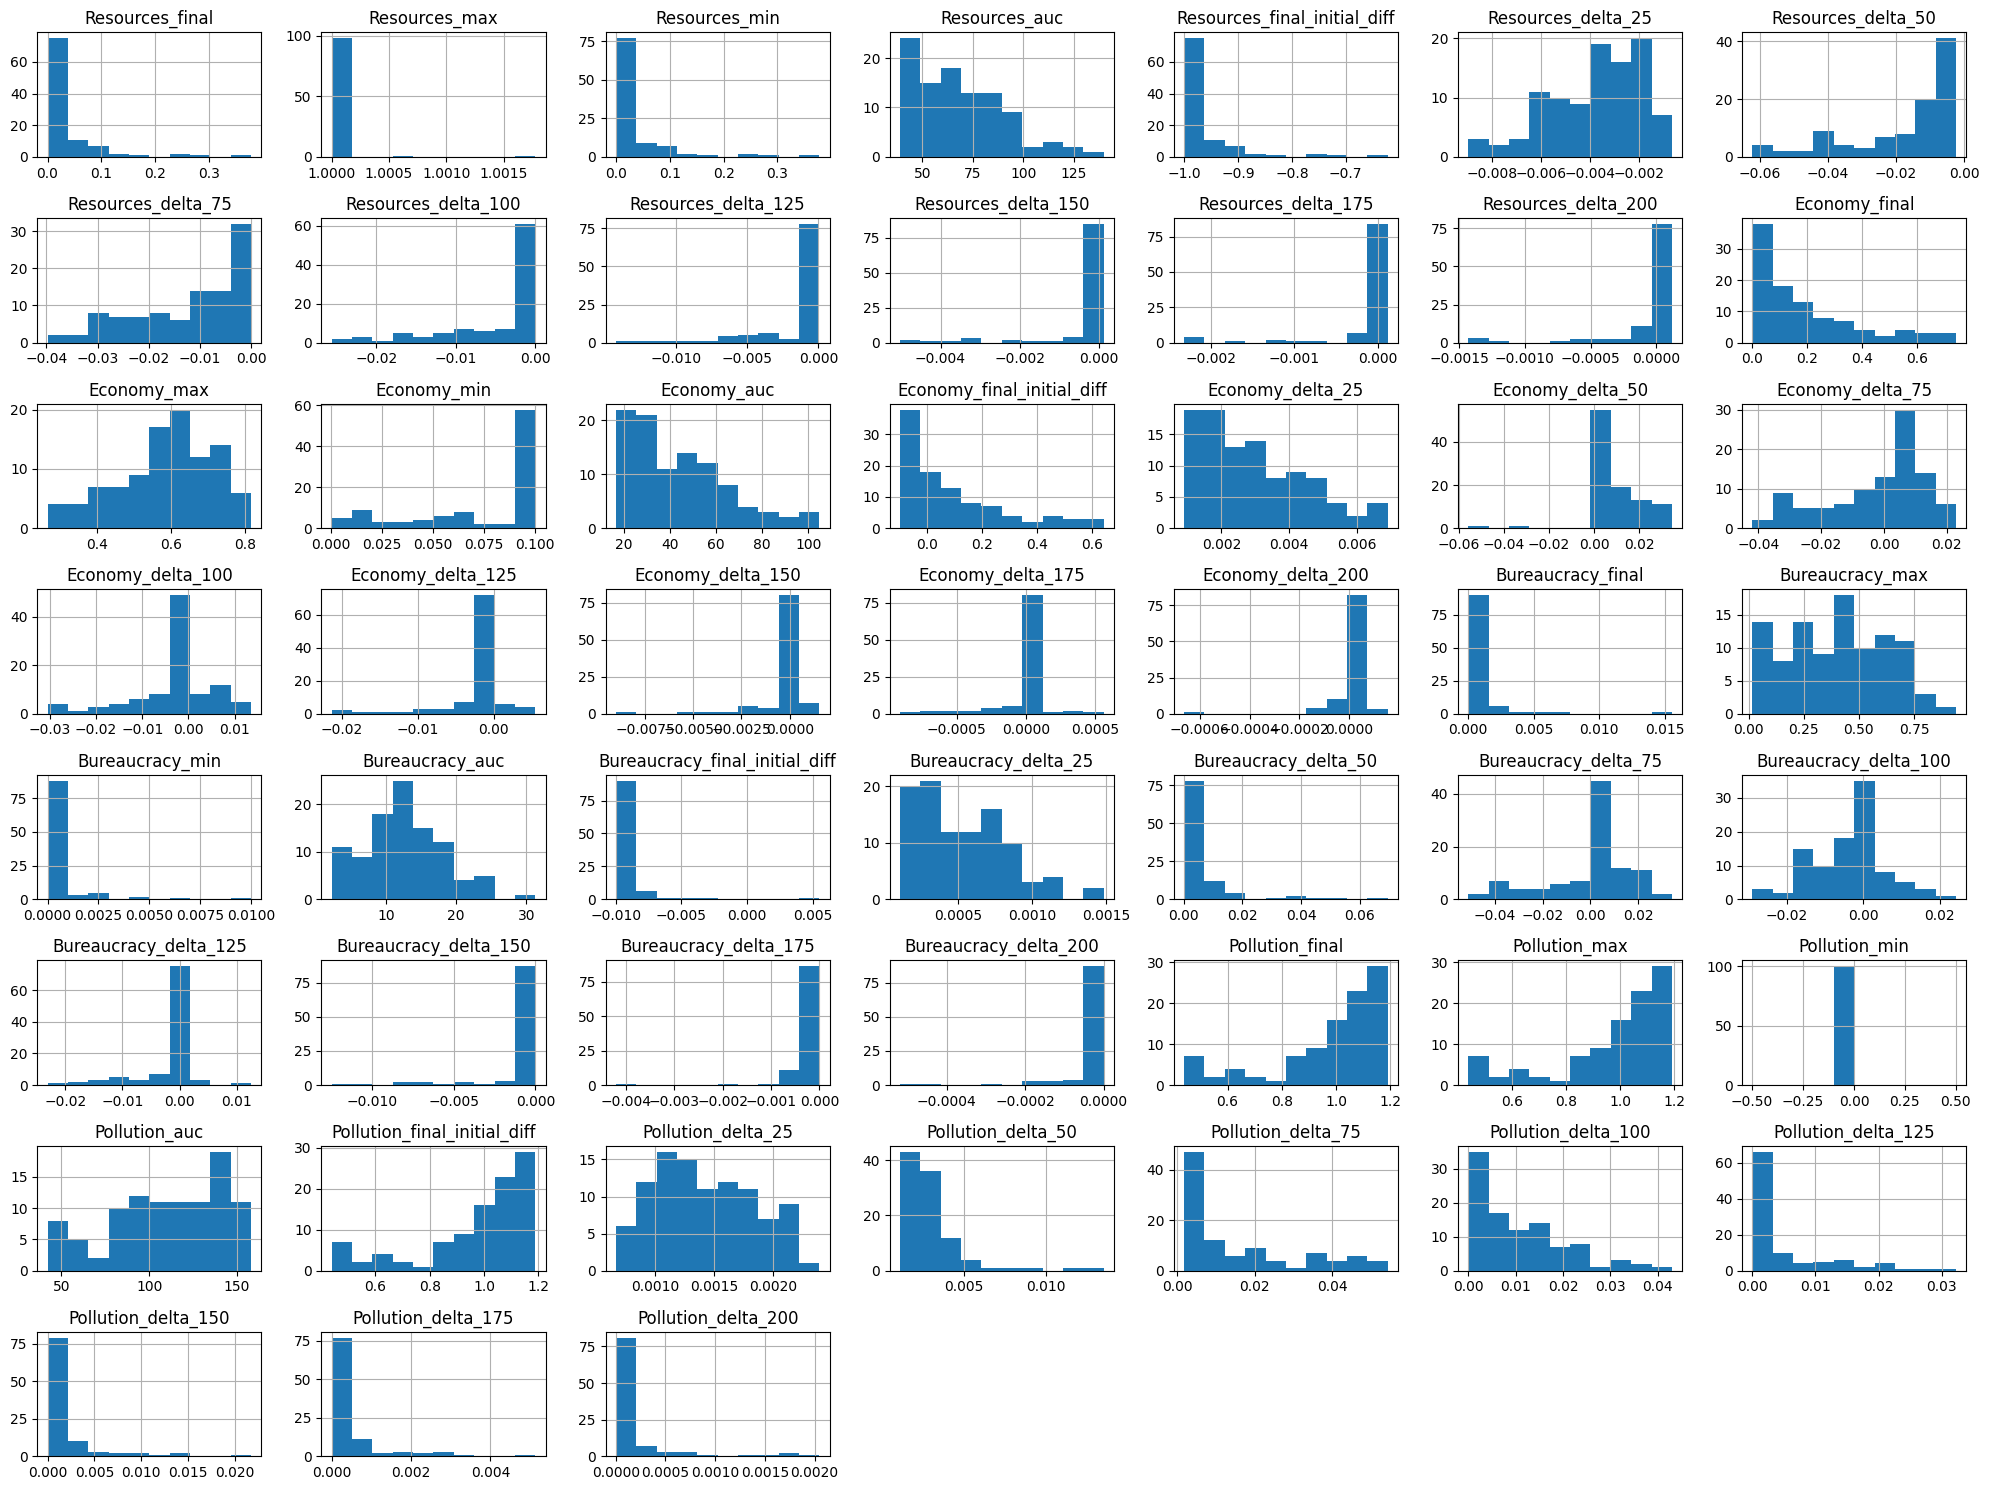

In [502]:
edau.plot_histograms(features_df)

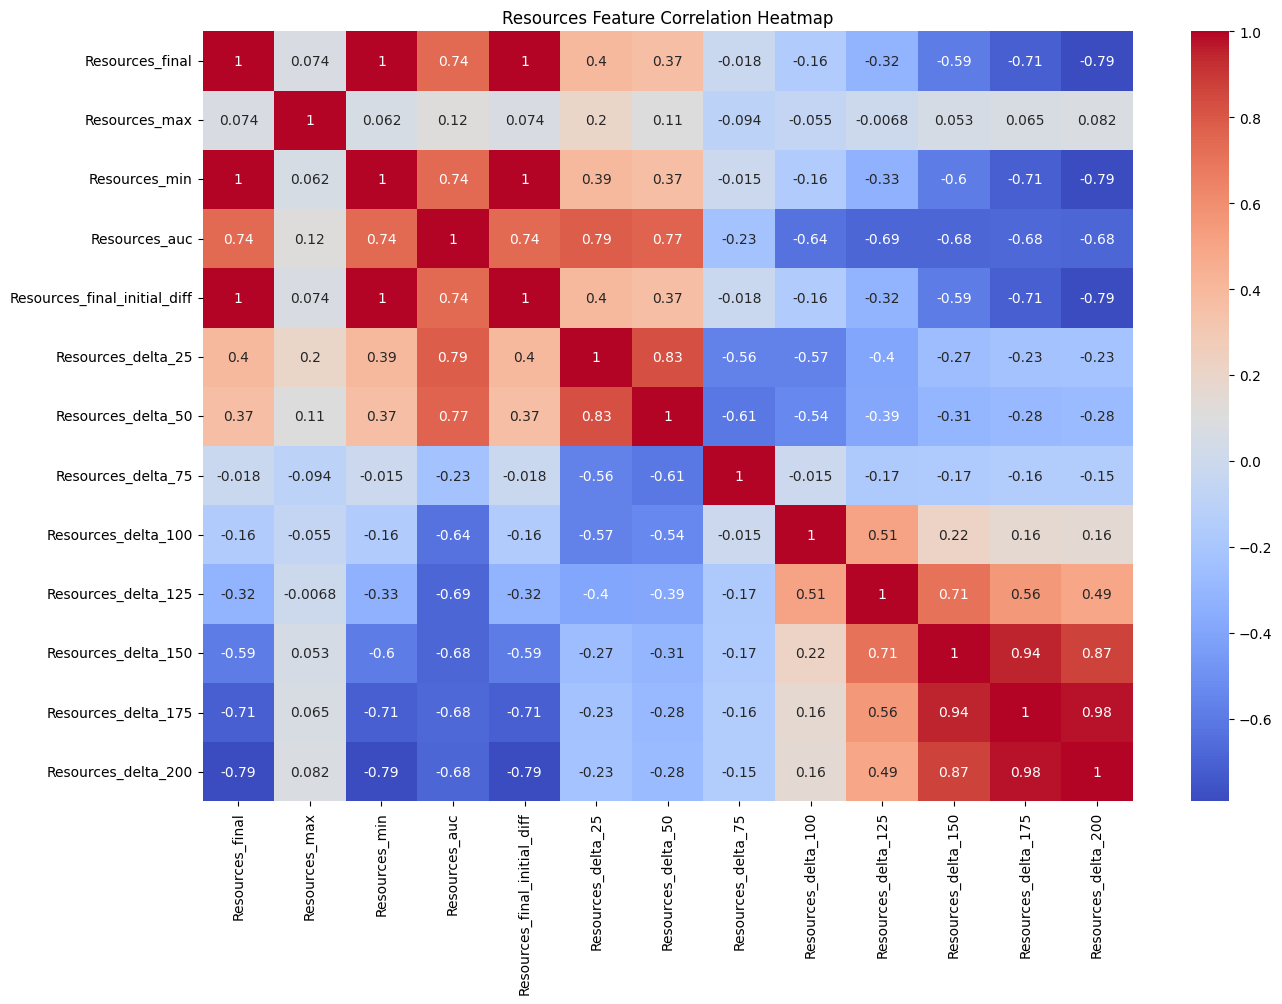

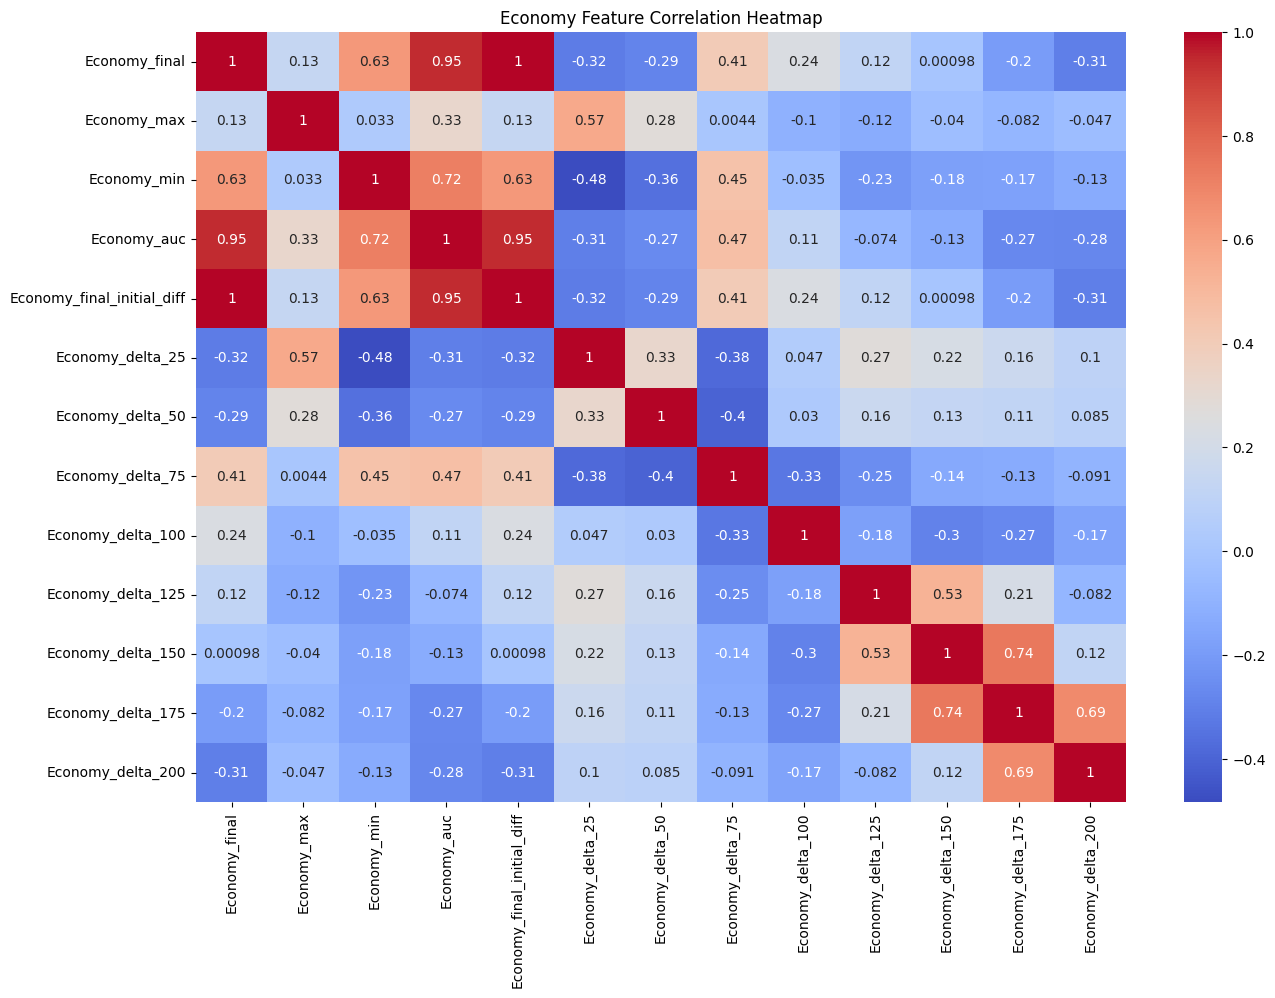

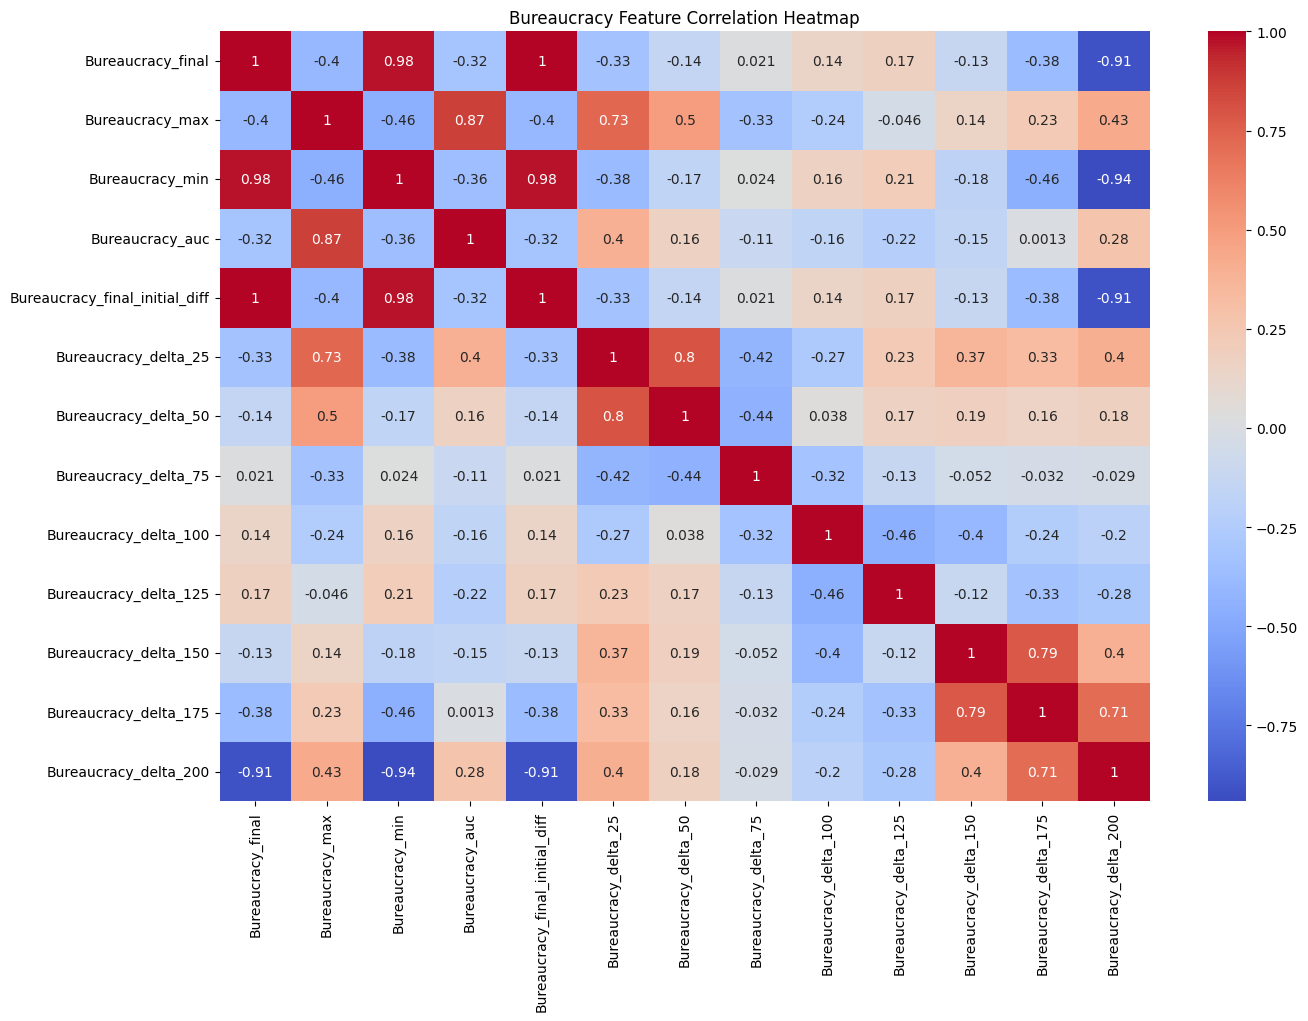

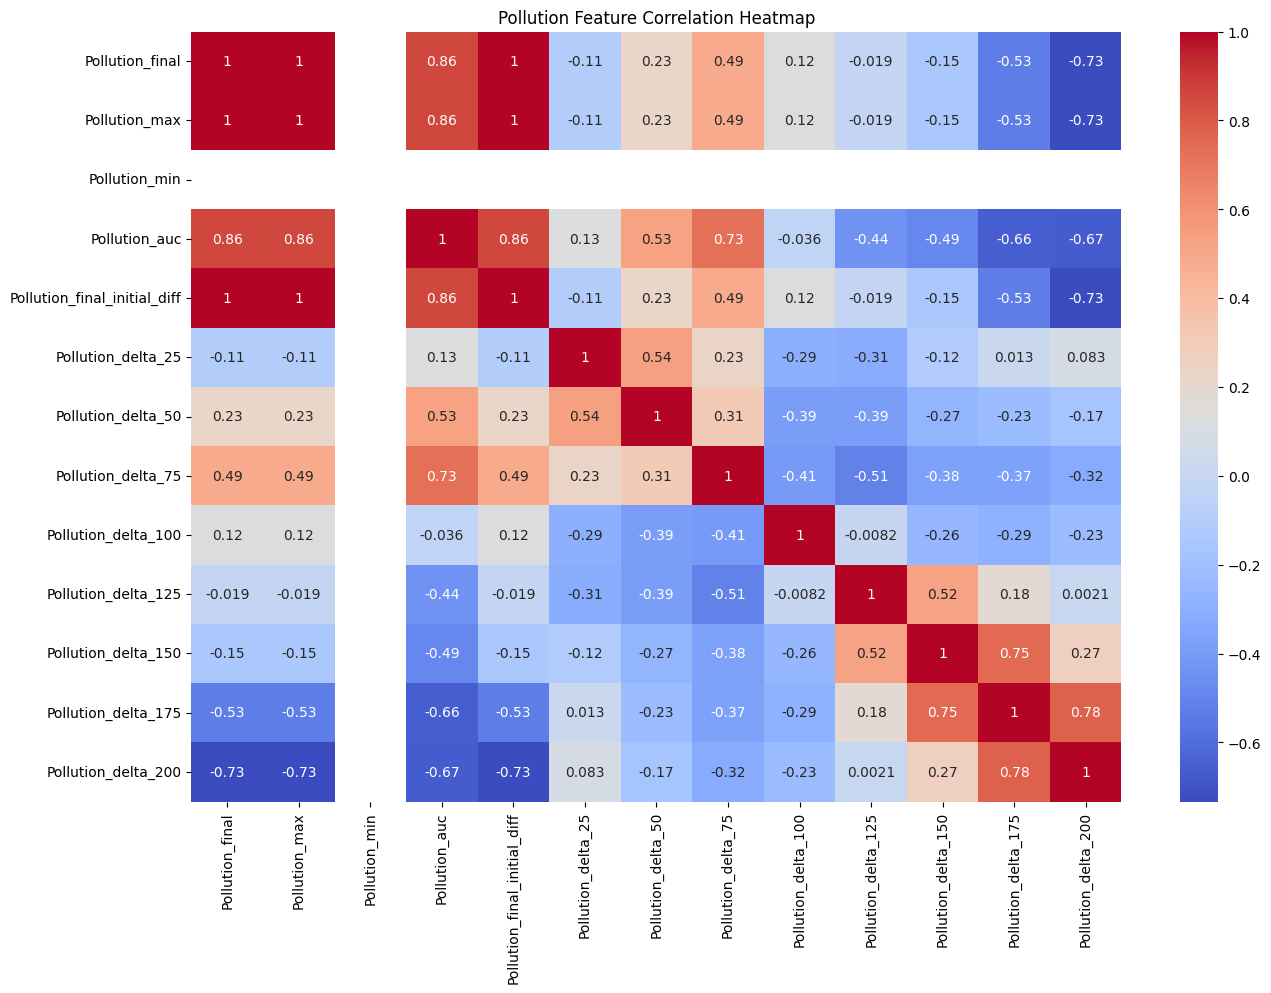

In [503]:
# Correlation heatmap to inspect relationships between features in each stock variable
def plot_corr_heatmap(df, stock_var_name):
    plt.figure(figsize=(15, 10))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
    plt.title(f"{stock_var_name} Feature Correlation Heatmap")
    plt.show()

plot_corr_heatmap(resources_feat_df, "Resources")
plot_corr_heatmap(economy_feat_df, "Economy")
plot_corr_heatmap(bureaucracy_feat_df, "Bureaucracy")
plot_corr_heatmap(pollution_feat_df, "Pollution")

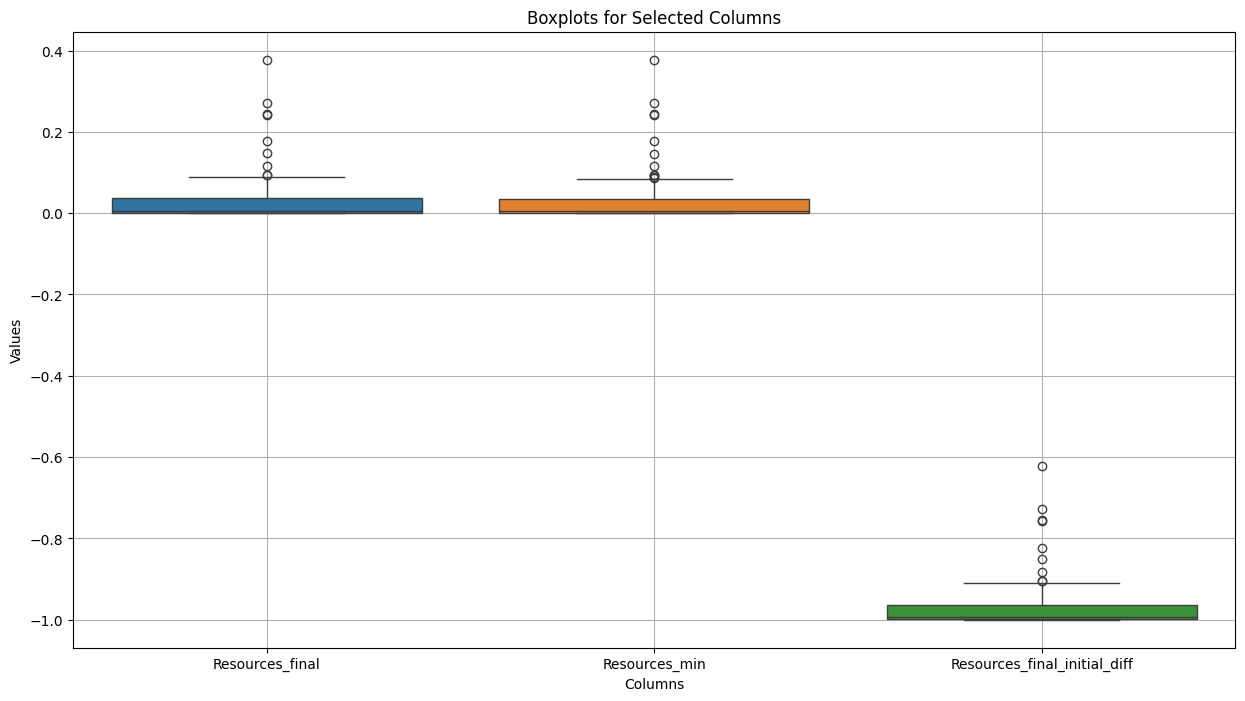

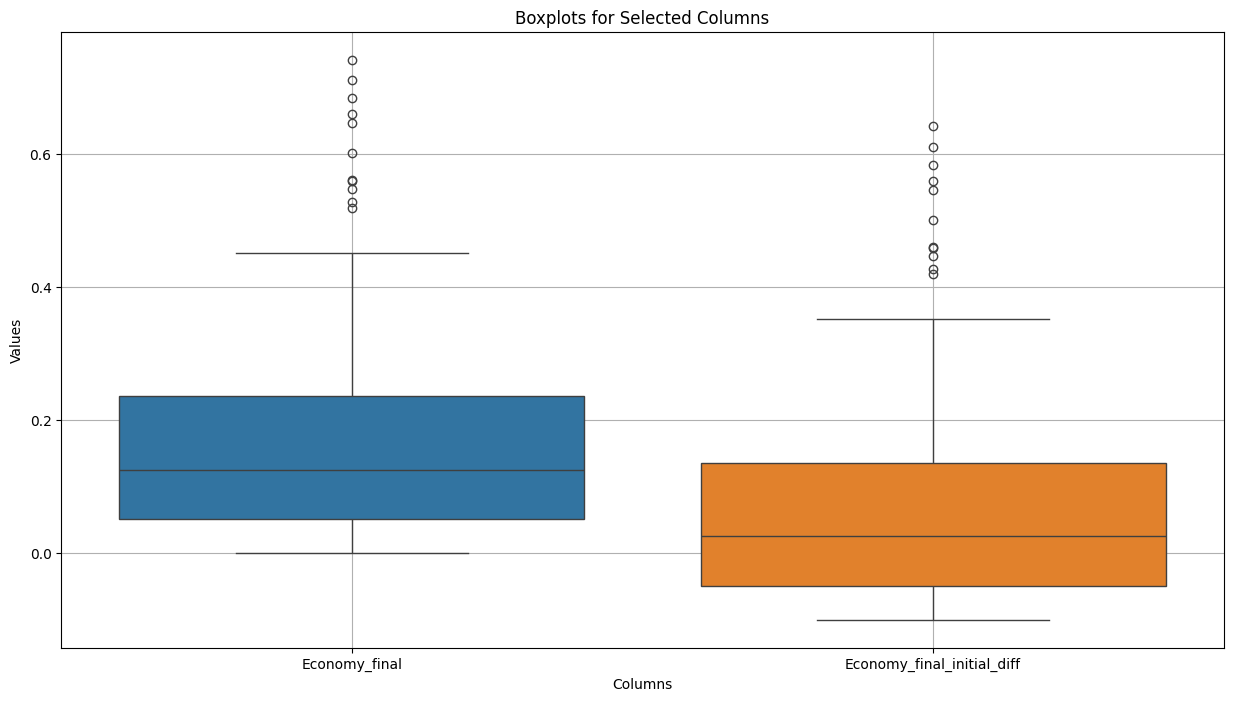

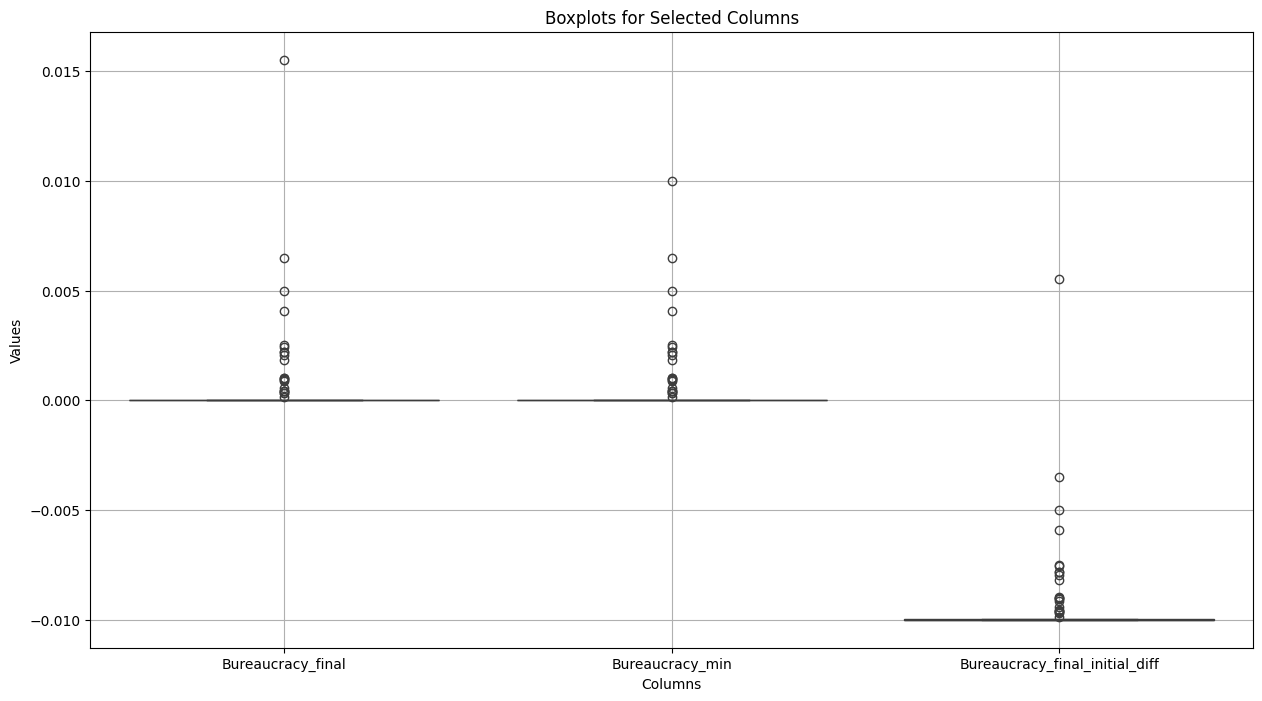

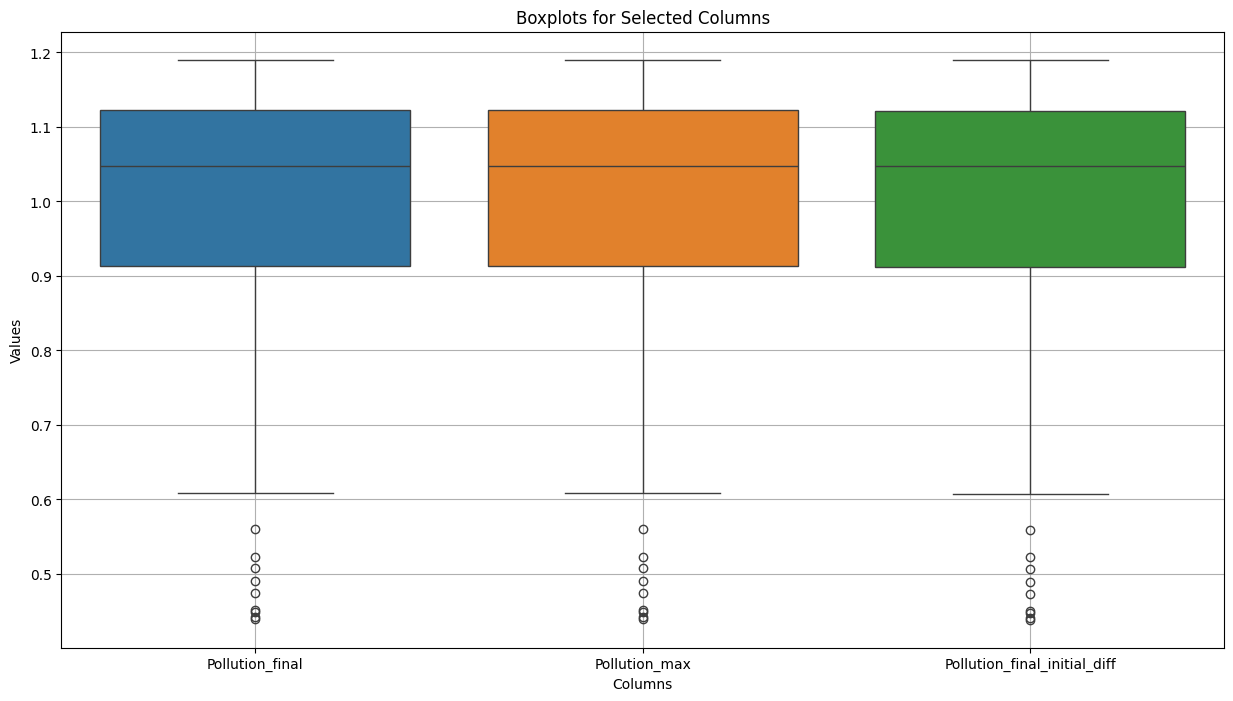

In [504]:
def plot_boxplots(df, columns):
    """
    Plots a single figure with boxplots for the specified columns in the DataFrame.

    Parameters:
    - df: pandas DataFrame containing the data.
    - columns: list of column names to create boxplots for.
    """
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df[columns])
    plt.title("Boxplots for Selected Columns")
    plt.xlabel("Columns")
    plt.ylabel("Values")
    plt.grid(True)
    plt.show()


plot_boxplots(resources_feat_df, ['Resources_final', 'Resources_min', 'Resources_final_initial_diff'])
plot_boxplots(economy_feat_df, ['Economy_final', 'Economy_final_initial_diff'])
plot_boxplots(bureaucracy_feat_df, ['Bureaucracy_final', 'Bureaucracy_min', 'Bureaucracy_final_initial_diff'])
plot_boxplots(pollution_feat_df, ['Pollution_final', 'Pollution_max', 'Pollution_final_initial_diff'])

## Data Preprocessing

In [505]:
# We drop redoundant variables and variable with very tight distributions
features_df = features_df.drop(columns=['Resources_max', 
                                        'Pollution_min', 
                                        'Resources_min', 
                                        'Resources_final_initial_diff', 
                                        'Pollution_max', 
                                        'Pollution_final_initial_diff', 
                                        'Bureaucracy_min', 
                                        'Bureaucracy_final_initial_diff', 
                                        'Economy_final_initial_diff'])


In [506]:
# # Calculate skewness for numeric features in the DataFrame
# skewness = features_df.skew(numeric_only=True)
# # print("Skewness of features:\n", skewness)

# # Define a threshold for high skewness, e.g., absolute skewness > 1
# threshold = 1
# skewed_features = skewness[abs(skewness) > threshold].index.tolist()
# print("Skewed features:", skewed_features)

In [507]:
# features_df_no_skew = features_df.drop(columns=skewed_features)

In [508]:
# # Histograms for each numeric feature
# edau.plot_histograms(features_df[skewed_features])

In [509]:
# # Log-transform the skewed features
# features_df_log = features_df.copy()

# # TODO: Only to skewed features or to all features?
# features_df_log = edau.apply_log_transform(features_df_log, skewed_features)

In [510]:
# edau.plot_histograms(features_df_log[skewed_features])

In [511]:
# Scale the features
X = features_df.copy()
# X = features_df_log.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.shape

(100, 43)

### PCA

Number of components selected: 8


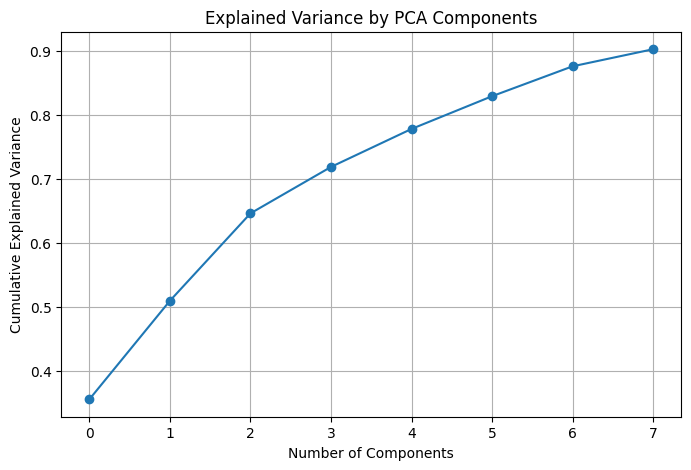

In [512]:
# Retain enough components to explain 90% of the variance
pca = PCA(n_components=0.9, random_state=42)
df_pca = pca.fit_transform(X_scaled)



print("Number of components selected:", pca.n_components_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

Explained variance ratio for all components: [3.55375545e-01 1.54169538e-01 1.36755886e-01 7.26591926e-02
 5.94459353e-02 5.12229434e-02 4.67901784e-02 2.67509273e-02
 2.38847845e-02 2.07138512e-02 1.28221200e-02 1.26715310e-02
 5.83960152e-03 4.86880499e-03 3.80467087e-03 3.15487461e-03
 2.29743890e-03 1.45785549e-03 1.18073946e-03 1.03006229e-03
 7.66770606e-04 6.55097121e-04 4.53682817e-04 3.78017961e-04
 2.20680607e-04 2.13231642e-04 1.48023072e-04 8.73453418e-05
 7.96364937e-05 4.88049524e-05 2.23680714e-05 1.68765691e-05
 5.13904345e-06 4.07098439e-06 2.62277279e-06 9.86906624e-07
 1.10618262e-07 2.96738672e-08 1.91648901e-08 3.37601782e-09
 1.24976646e-09 1.50504958e-10 4.96458497e-11]


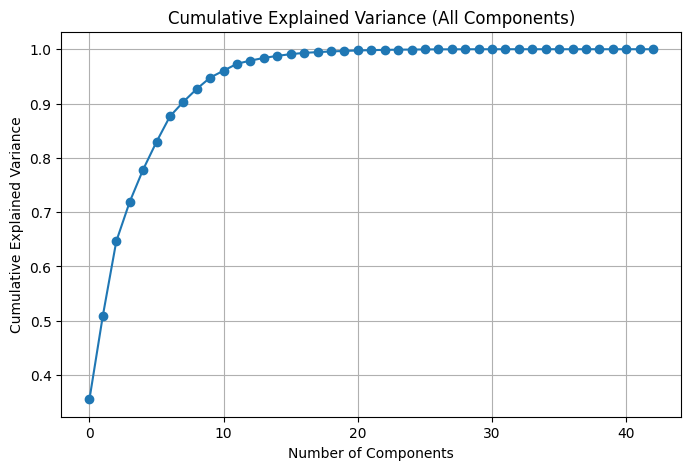

In [513]:
pca_full = PCA(n_components=None, random_state=42)
df_pca_full = pca_full.fit_transform(X_scaled)
print("Explained variance ratio for all components:", pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance (All Components)")
plt.grid(True)
plt.show()


In [514]:
# # Each row = feature, each column = principal component
# loadings = pd.DataFrame(
#     pca_full.components_.T,  # Transpose to have features as rows
#     index=features_df_log.columns,  # Feature names
#     columns=[f'PC{i+1}' for i in range(pca_full.n_components_)]
# )

# # Select top N components to visualize
# top_n = 5
# plt.figure(figsize=(12, min(0.5 * len(loadings), 12)))
# sns.heatmap(loadings.iloc[:, :top_n], annot=True, cmap='coolwarm', center=0)
# plt.title(f"PCA Loadings (Top {top_n} Components)")
# plt.xlabel("Principal Components")
# plt.ylabel("Original Features")
# plt.tight_layout()
# plt.show()

# # Create a dataframe that shows the relationship between the components and the original variables
# df_pca_comp = pd.DataFrame(data = pca.components_,
#                            columns = features_df_log.columns)

# # Create the Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
# plt.figure(figsize=(70,10))
# sns.heatmap(df_pca_comp,
#             vmin = -1, 
#             vmax = 1,
#             cmap = 'RdBu',
#             annot = True)

# plt.title('Components vs Original Features',fontsize = 14)
# plt.show()

In [515]:
np.cumsum(pca.explained_variance_ratio_)

array([0.35537554, 0.50954508, 0.64630097, 0.71896016, 0.7784061 ,
       0.82962904, 0.87641922, 0.90317015])

In [516]:
df_pca.shape

(100, 8)

In [517]:
rows_n = df_pca.shape[0]

## Train Models

### Visualization Functions

### K means

In [518]:
def plot_clusters(df, clusters, principal_component_x=0, principal_component_y=1, principal_component_z=None):
    """
    Plots clusters using 2D or 3D PCA-transformed data.

    Parameters:
    - df: ndarray or DataFrame with PCA components
    - clusters: cluster labels
    - principal_component_x, principal_component_y: indexes of PCA components for 2D plot
    - principal_component_z: index of third component for 3D plot (optional)
    """
    
    if principal_component_z is not None and df.shape[1] > principal_component_z:
        # 3D Plot
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(
            df[:, principal_component_x], 
            df[:, principal_component_y], 
            df[:, principal_component_z], 
            c=clusters, cmap="plasma", edgecolor='k'
        )
        ax.set_xlabel(f"Principal Component {principal_component_x + 1}")
        ax.set_ylabel(f"Principal Component {principal_component_y + 1}")
        ax.set_zlabel(f"Principal Component {principal_component_z + 1}")
        ax.set_title("Cluster Visualization (PCA 3D)")

        # Create legend
        unique_clusters = np.unique(clusters)
        handles = [
            mpatches.Patch(color=scatter.cmap(scatter.norm(cl)), label=f"Cluster {cl}")
            for cl in unique_clusters
        ]
        ax.legend(handles=handles, title="Cluster Label", loc="upper left")
        plt.show()

    elif df.shape[1] >= 2:
        # 2D Plot
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(
            df[:, principal_component_x], 
            df[:, principal_component_y], 
            c=clusters, cmap="plasma", edgecolor='k'
        )
        plt.xlabel(f"Principal Component {principal_component_x + 1}")
        plt.ylabel(f"Principal Component {principal_component_y + 1}")
        plt.title("Cluster Visualization (PCA 2D)")
        plt.grid(True)

        unique_clusters = np.unique(clusters)
        handles = [
            mpatches.Patch(color=scatter.cmap(scatter.norm(cl)), label=f"Cluster {cl}")
            for cl in unique_clusters
        ]
        plt.legend(handles=handles, title="Cluster Label", loc="best")
        plt.show()
    
    else:
        print("Not enough components to visualize clusters.")
        
    return None


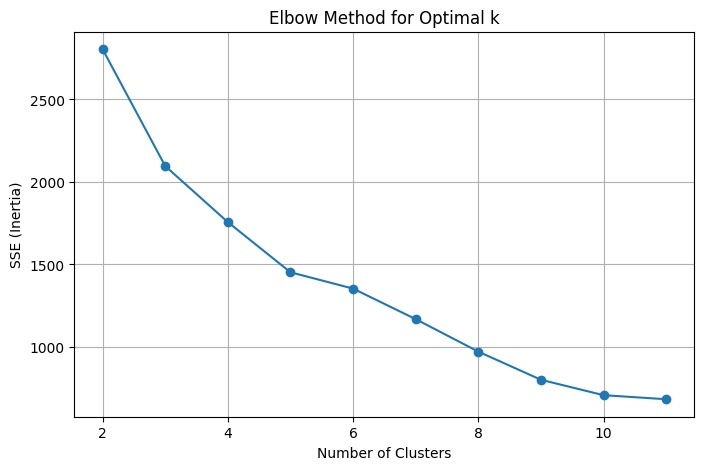

In [519]:
sse = []
k_range = range(2, 12)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(list(k_range), sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


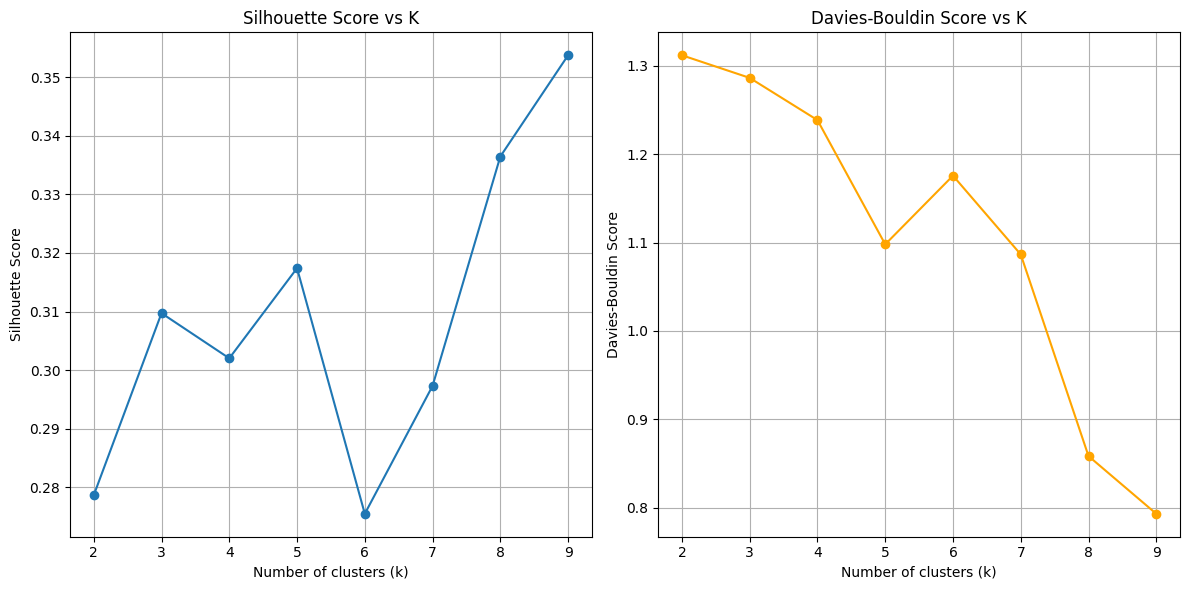

In [520]:
# Define the range of k (number of clusters) to test
k_values = range(2, 10) 

results = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = kmeans.fit_predict(df_pca)
    
    # Evaluate scores
    silhouette = silhouette_score(df_pca, labels)
    dbi = davies_bouldin_score(df_pca, labels)

    results.append({
        "k": k,
        "silhouette_score": silhouette,
        "davies_bouldin": dbi
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(results_df["k"], results_df["silhouette_score"], marker='o')
plt.title("Silhouette Score vs K")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(results_df["k"], results_df["davies_bouldin"], marker='o', color='orange')
plt.title("Davies-Bouldin Score vs K")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)

plt.tight_layout()
plt.show()

In [555]:
k = 5 # Adjust this value based on the elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_kmeans = kmeans.fit_predict(df_pca)

# Evaluate clustering quality
sil_score = silhouette_score(df_pca, clusters_kmeans)
print("Silhouette Score:", sil_score)

dbi = davies_bouldin_score(df_pca, clusters_kmeans)
print(f"Davies-Bouldin Score: {dbi:.3f}")

Silhouette Score: 0.317407408823744
Davies-Bouldin Score: 1.098


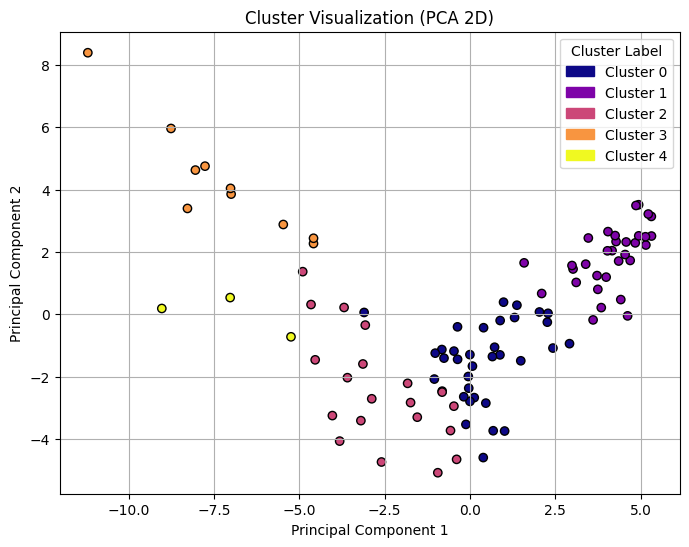

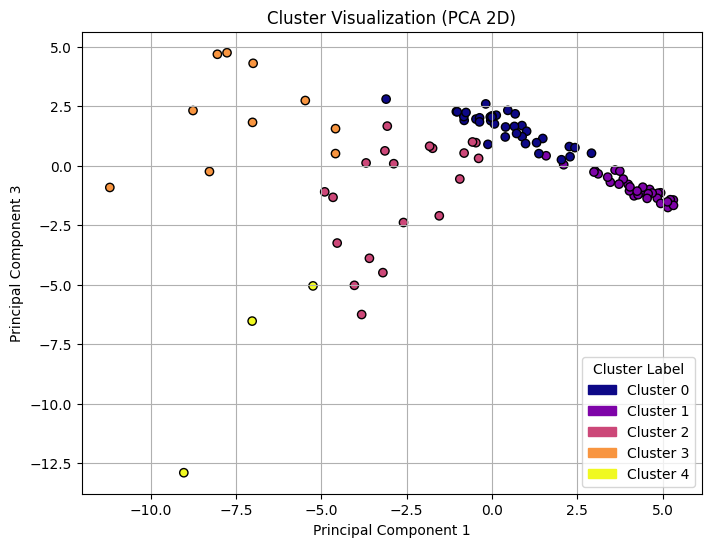

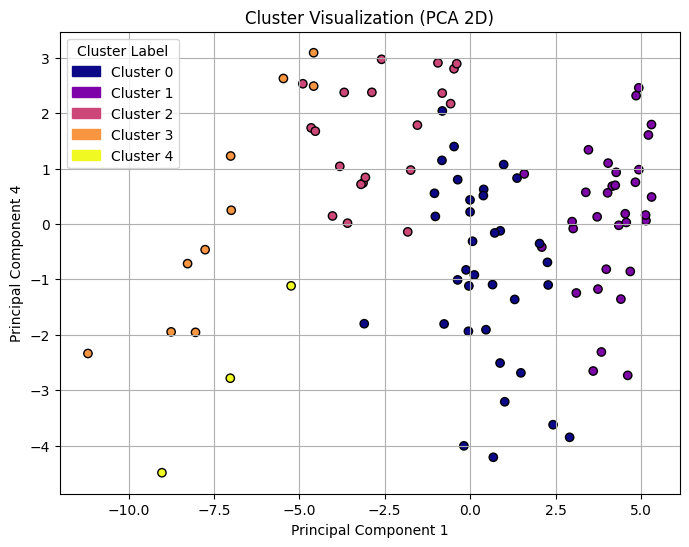

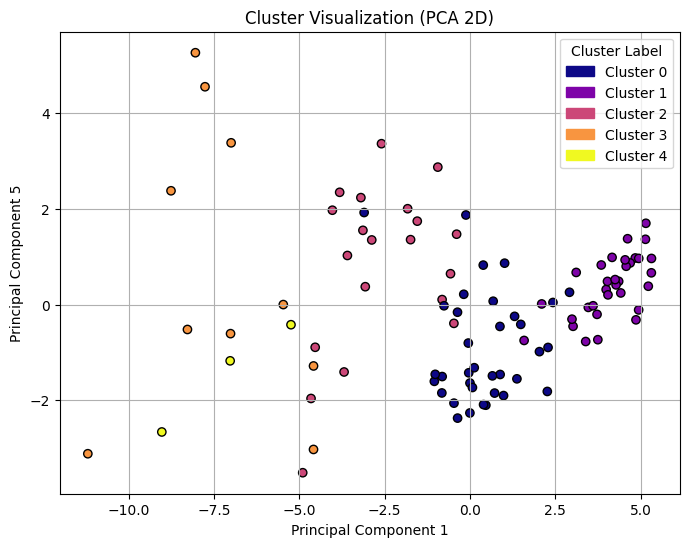

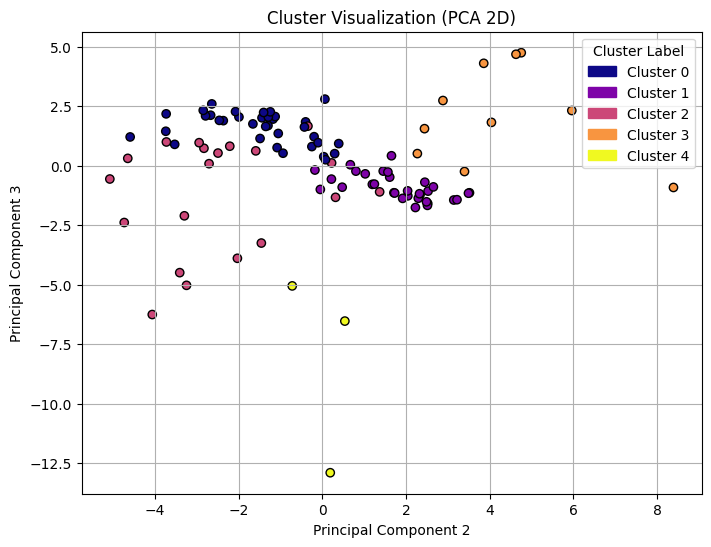

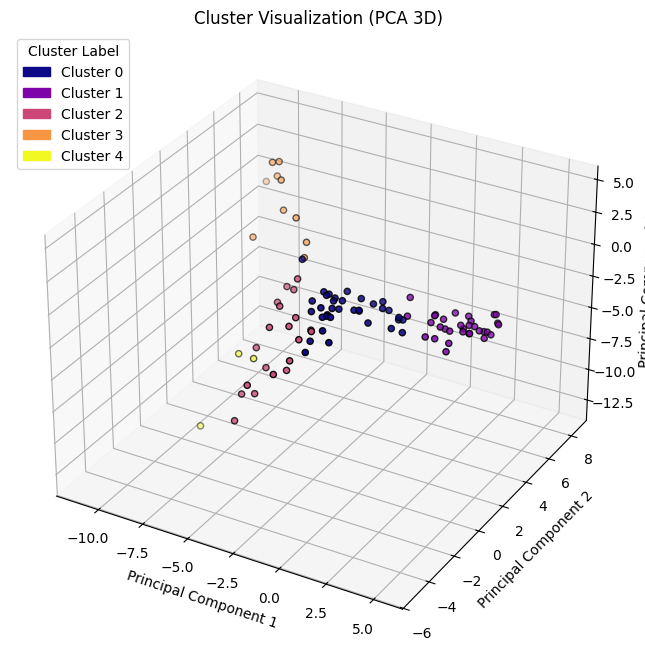

In [556]:
# Plot KMeans clusters from different PCA components

plot_clusters(df_pca, clusters_kmeans)
plot_clusters(df_pca, clusters_kmeans, 0, 2)
plot_clusters(df_pca, clusters_kmeans, 0, 3)
plot_clusters(df_pca, clusters_kmeans, 0 ,4)
plot_clusters(df_pca, clusters_kmeans, 1 ,2)
plot_clusters(df_pca, clusters_kmeans, 0, 1, 2)

### DBSCAN

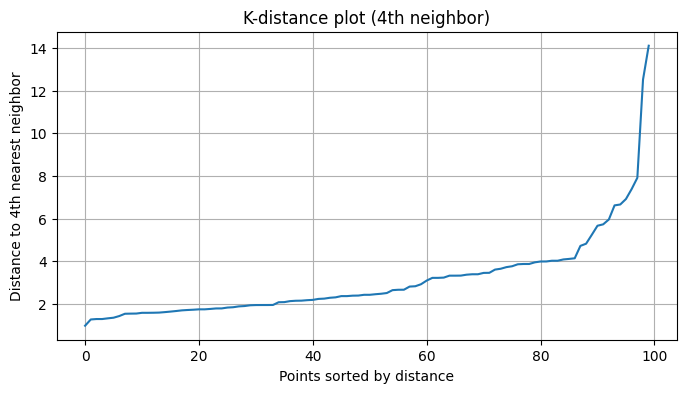

In [557]:
# Fit nearest neighbors
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_pca)
distances, indices = neighbors_fit.kneighbors(df_pca)

# Sort distances to find the "knee" point
distances = np.sort(distances[:, 4])  # 4th nearest neighbor distance
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title("K-distance plot (4th neighbor)")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 4th nearest neighbor")
plt.grid(True)
plt.show()


In [558]:
# Try some values first
dbscan = DBSCAN(eps=7, min_samples=5)  # Adjust eps based on elbow plot
dbscan.fit(df_pca)

# Add cluster labels to original dataframe
labels = dbscan.labels_  # -1 means noise


In [559]:
# # Exclude noise points
# mask = labels != -1
# if len(set(labels)) > 1 and sum(mask) > 1:
#     score = silhouette_score(df_pca[mask], labels[mask])
#     print(f"Silhouette Score: {score:.3f}")
# else:
#     print("Not enough clusters (or too much noise) to compute silhouette score.")

    

# if len(set(labels)) > 1 and sum(mask) > 1:
#     dbi = davies_bouldin_score(df_pca[mask], labels[mask])
#     print(f"Davies-Bouldin Index: {dbi:.3f}")



In [560]:

# Define the eps range and min_samples
eps_values = np.arange(0.5, 15.0, 0.1)  # Adjust based on your k-distance plot
min_samples = 5

results = []

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(df_pca)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    # Mask for non-noise points
    mask = labels != -1
    
    # Only evaluate if we have at least 2 clusters and some valid points
    if n_clusters >= 2 and np.sum(mask) > 10:
        silhouette = silhouette_score(df_pca[mask], labels[mask])
        dbi = davies_bouldin_score(df_pca[mask], labels[mask])
    else:
        silhouette = np.nan
        dbi = np.nan
    
    results.append({
        "eps": eps,
        "clusters": n_clusters,
        "noise_points": n_noise,
        "silhouette_score": silhouette,
        "davies_bouldin": dbi
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

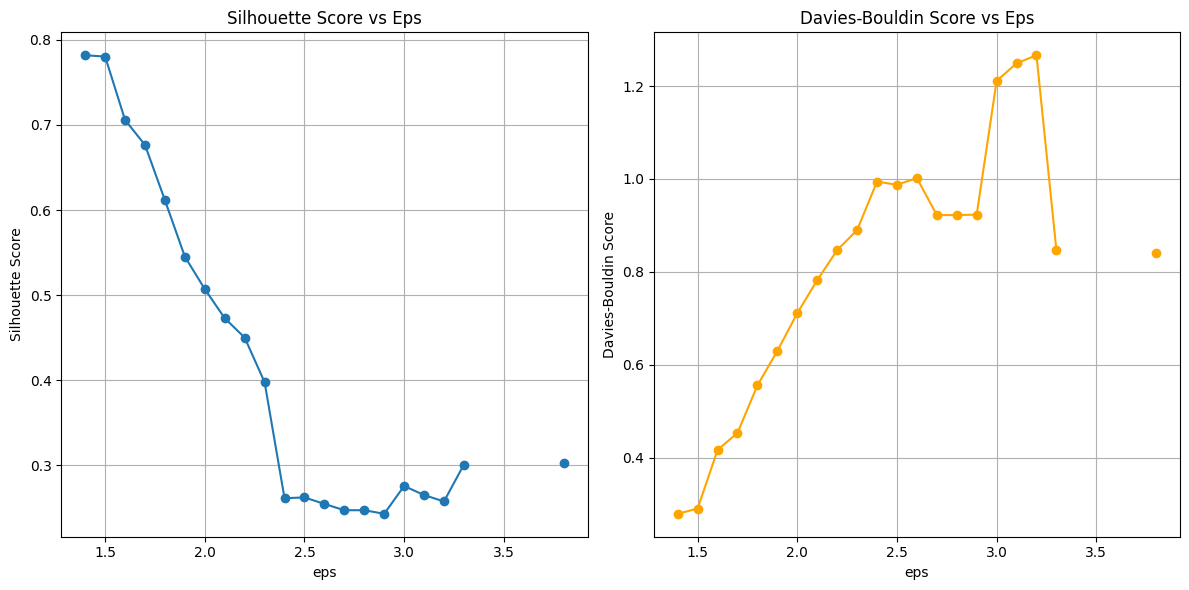

In [561]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(results_df["eps"], results_df["silhouette_score"], marker='o')
plt.title("Silhouette Score vs Eps")
plt.xlabel("eps")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(results_df["eps"], results_df["davies_bouldin"], marker='o', color='orange')
plt.title("Davies-Bouldin Score vs Eps")
plt.xlabel("eps")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)

plt.tight_layout()
plt.show()

In [562]:
eps = 1.5

dbscan = DBSCAN(eps=eps, min_samples=5)
dbscan.fit(df_pca)

# Add cluster labels to original dataframe
labels = dbscan.labels_  # -1 means noise


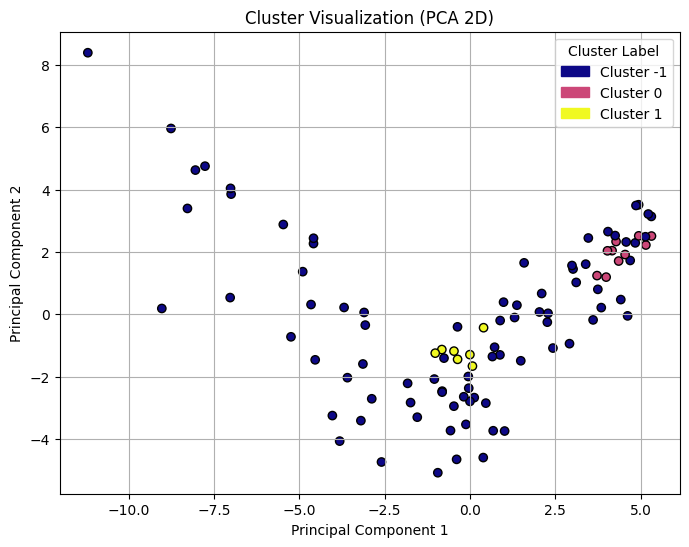

In [563]:
# Plot DBSCAN clusters from different PCA components
plot_clusters(df_pca, labels)

## Add Labels to Output Df

In [564]:
transformed_output_df.head()

,run_id,Resources_final,Resources_max,Resources_min,Resources_auc,Resources_final_initial_diff,Resources_delta_25,Resources_delta_50,Resources_delta_75,Resources_delta_100,...,Pollution_delta_25,Pollution_delta_50,Pollution_delta_75,Pollution_delta_100,Pollution_delta_125,Pollution_delta_150,Pollution_delta_175,Pollution_delta_200,kmeans_cluster_id,dbscan_cluster_id
0,1.0,0.013482,1.0,0.012950,67.206526,-0.986518,-0.001908,-0.008547,-0.039775,-0.000163,...,0.000732,0.001455,0.008233,0.016480,0.000056,0.000013,0.000013,0.000013,0,-1
1,2.0,0.000045,1.0,0.000045,51.009895,-0.999955,-0.005797,-0.019693,-0.005408,-0.000003,...,0.001877,0.003324,0.009279,0.024890,0.001662,0.000063,0.000003,0.000001,0,-1
2,3.0,0.010809,1.0,0.010809,70.233630,-0.989191,-0.002555,-0.007302,-0.025920,-0.002112,...,0.001446,0.002349,0.005376,0.034101,0.003066,0.000078,0.000017,0.000016,0,-1
3,4.0,0.016318,1.0,0.016318,74.944802,-0.983682,-0.004887,-0.008939,-0.011405,-0.008193,...,0.001870,0.002926,0.003631,0.003365,0.002713,0.001786,0.000906,0.000415,2,-1
4,5.0,0.000137,1.0,0.000137,64.836249,-0.999863,-0.003191,-0.009570,-0.027257,-0.000636,...,0.001066,0.001869,0.003498,0.022283,0.005552,0.000136,0.000005,0.000003,8,-1


In [565]:
# Add cluster labels to the transformed DataFrame
transformed_output_df["kmeans_cluster_id"] = clusters_kmeans
transformed_output_df["dbscan_cluster_id"] = labels
# Save the transformed DataFrame with cluster labels
transformed_output_df.to_csv(os.path.join(porcessed_data_dir, f'transformed_output_with_{k}_clusters.csv'), index=False)

# Create a new df to map run_id to cluster_id
cluster_mapping_df = transformed_output_df[["run_id", "kmeans_cluster_id", "dbscan_cluster_id"]]

cluster_mapping_df

,run_id,kmeans_cluster_id,dbscan_cluster_id
0,1.0,0,-1
1,2.0,0,-1
2,3.0,0,-1
3,4.0,3,-1
4,5.0,0,-1
...,...,...,...
95,96.0,0,-1
96,97.0,0,-1
97,98.0,2,-1
98,99.0,0,-1


In [566]:
# Check for duplicates in the mapping DataFrame
print('duplicates: ', cluster_mapping_df.duplicated().sum())
# Check for null values in the mapping DataFrame
print('null values: \n', cluster_mapping_df.isnull().sum())

duplicates:  0
null values: 
 run_id               0
kmeans_cluster_id    0
dbscan_cluster_id    0
dtype: int64


In [567]:
output_df.head()

,Resources,Economy,Bureaucracy,Pollution,time,run_id
0,1.000000,0.100000,0.010000,0.001000,0.0,1.0
1,0.999951,0.100172,0.010046,0.001101,0.2,1.0
2,0.999901,0.100345,0.010093,0.001203,0.4,1.0
3,0.999849,0.100519,0.010140,0.001304,0.6,1.0
4,0.999796,0.100694,0.010187,0.001406,0.8,1.0


In [568]:
# Merge the cluster mapping DataFrame with the original output DataFrame
output_df_with_labels = output_df.merge(cluster_mapping_df, on="run_id", how="left")
output_df_with_labels.head()

,Resources,Economy,Bureaucracy,Pollution,time,run_id,kmeans_cluster_id,dbscan_cluster_id
0,1.000000,0.100000,0.010000,0.001000,0.0,1.0,0,-1
1,0.999951,0.100172,0.010046,0.001101,0.2,1.0,0,-1
2,0.999901,0.100345,0.010093,0.001203,0.4,1.0,0,-1
3,0.999849,0.100519,0.010140,0.001304,0.6,1.0,0,-1
4,0.999796,0.100694,0.010187,0.001406,0.8,1.0,0,-1


In [569]:
output_df_with_labels.tail()

,Resources,Economy,Bureaucracy,Pollution,time,run_id,kmeans_cluster_id,dbscan_cluster_id
100095,0.000209,0.020162,9.452395e-07,1.143534,199.2,100.0,1,-1
100096,0.000209,0.020162,9.224389e-07,1.143534,199.4,100.0,1,-1
100097,0.000209,0.020162,9.001884e-07,1.143534,199.6,100.0,1,-1
100098,0.000209,0.020162,8.784745e-07,1.143534,199.8,100.0,1,-1
100099,0.000209,0.020162,8.572844e-07,1.143534,200.0,100.0,1,-1


In [570]:
# Sanity check that each run id is only in one cluster
output_df_with_labels.groupby("run_id")["kmeans_cluster_id"].nunique().value_counts()

kmeans_cluster_id
1    100
Name: count, dtype: int64

In [571]:

# File name for the processed data
processed_data_file = os.path.join(porcessed_data_dir, f'bardis_ensemble_python_ver_{rows_n}_k{k}_eps{eps}.csv')
# Save the output DataFrame with cluster labels
output_df_with_labels.to_csv(processed_data_file, index=False)

print(f"Processed data saved to {processed_data_file}")


Processed data saved to /home/tony-ubuntu/decision_sciences/looking_back_to_look_forward/results_analysis/processed_data/bardis_ensemble_python_ver_100_k5_eps1.5.csv
